# Financial Analysis Using Pandas
This cookbook includes recipes for working with financial data. It shows examples for using `pandas.io.data` functionality to extract data from various Internet sources into a DataFrame. It also shows various ways to plot financial data.

DataReader is an API that obtains information from online sources. Use the args: `(indicator, source, startdate, enddate)`

Currently the following sources are supported for pandas:

* Yahoo! Finance
* Google Finance
* St. Louis FED (FRED)
* Kenneth French's data library
* The World Bank

Note, that the sources support different kinds of data. Not all sources implement the same methods and the returned data elements might differ as well.

For example:  

`pd.io.data.get_data_yahoo()`

`pd.io.data..DataReader("F", 'google', start=datetime.datetime(2014, 10, 1), 
                                 end=datetime.datetime(2015, 1, 1))`

## Yahoo! Finance
Get stock info of a company using its [ticker symbol](http://en.wikipedia.org/wiki/Ticker_symbol) from Yahoo! Finance. Store the result locally in a `csv` file and read into a pandas DataFrame.



In [1]:
#<help:yahoo_finance>
import datetime
import pandas as pd
import numpy as np
import pandas.io.data
goog = pd.io.data.get_data_yahoo('GOOG', 
                                 start=datetime.datetime(2009, 10, 1), 
                                 end=datetime.datetime(2015, 1, 1))
goog.to_csv('google.csv')
df = pd.read_csv('/resources/google.csv', index_col='Date', parse_dates=True)
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-12-05,531.00,532.89,524.28,525.26,2552700,525.26
2014-12-08,527.13,531.00,523.79,526.98,2323000,526.98
2014-12-09,522.14,534.19,520.50,533.37,1866200,533.37
2014-12-10,533.08,536.33,525.56,526.06,1707600,526.06
2014-12-11,527.80,533.92,527.10,528.34,1602300,528.34


Calculate the rolling mean.

In [2]:
#<help:yahoo_finance_rolling_mean>
import datetime
import pandas as pd
import numpy as np
import pandas.io.data
goog = pd.io.data.get_data_yahoo('GOOG', 
                                 start=datetime.datetime(2009, 10, 1), 
                                 end=datetime.datetime(2015, 1, 1))
goog.to_csv('google.csv')
df = pd.read_csv('/resources/google.csv', index_col='Date', parse_dates=True)
close_px = df['Adj Close']
mavg = pd.rolling_mean(close_px, 40)
mavg[-10:]

Date
2014-11-28    543.99800
2014-12-01    542.96100
2014-12-02    541.87100
2014-12-03    541.06050
2014-12-04    540.18075
2014-12-05    539.29025
2014-12-08    538.85250
2014-12-09    538.85650
2014-12-10    538.55950
2014-12-11    538.51725
dtype: float64

## Google Finance

Get stock info of a company using its ticker symbol from Google Finance. Store the result locally in a csv file and read into a pandas DataFrame.

In [3]:
#<help:google_finance>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)
f= pd.io.data.DataReader("F", 'google', start, end) #Ford Stock Qote
f.ix['2013-01-04']

Open         13.51
High         13.61
Low          13.35
Close        13.57
Volume    54674987
Name: 2013-01-04 00:00:00, dtype: object

##FRED (Federal Reserve Economic Data)

The Federal Reserve Economic Data [website](http://research.stlouisfed.org/fred2/) provides a database with more than 237,000 time series of financial data.

FRED contains:
* banking information, business/fiscal, consumer price indexes, employment and population, exchange rates, gross domestic product, interest rates, monetary aggregates, producer price indexes, reserves and monetary base, U.S. trade and international transactions, and U.S. financial data

Locate the indicator and review.

In [4]:
#<help:fred_finance_gdp>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
import pandas.io.data as web
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)
gdp=web.DataReader("GDP", "fred", start, end)
gdp.ix['2013-01-01']

GDP    16502.4
Name: 2013-01-01 00:00:00, dtype: float64

In [5]:
#<help:fred_finance_inflation>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
import pandas.io.data as web
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)
gdp=web.DataReader("GDP", "fred", start, end)
gdp.ix['2013-01-01']
inflation = web.DataReader(["CPIAUCSL", "CPILFESL"], "fred", start, end)
inflation.tail()

,CPIAUCSL,CPILFESL
DATE,,
2014-06-01,237.693,238.083
2014-07-01,237.909,238.311
2014-08-01,237.428,238.345
2014-09-01,237.633,238.677
2014-10-01,237.642,239.162


In [6]:
#<help:fred_finance_currency>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
import pandas.io.data as web
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)
jpy = web.DataReader('DEXJPUS', 'fred', start, end)
jpy.tail()

,DEXJPUS
DATE,
2014-12-01,118.14
2014-12-02,119.10
2014-12-03,119.82
2014-12-04,119.67
2014-12-05,121.38


## Fama/French  

Dataset names are listed at [Fama/French Data Library](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).
Used to describe stock returns (Rm-Rf) for the US Market. It is the alue-weight return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ that have a CRSP share code of 10 or 11 at the beginning of month `t`, good shares and price data at the beginning of `t`, and good return data for `t`.

In [7]:
#<help:fama_french>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
import pandas.io.data as web
ip=web.DataReader("5_Industry_Portfolios", "famafrench")
ip[4].ix[192608]

1 Cnsmr    2.74
2 Manuf    2.27
3 HiTec    2.41
4 Hlth     4.51
5 Other    4.38
Name: 192608, dtype: float64

## World Bank
`pandas`  can easily access thousands of panel data series from the [World Bank’s World Development Indicators](http://data.worldbank.org/) by using the `wb` I/O functions.

In [8]:
#<help:world_bank_finance>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
from pandas.io import wb
wb.search('gdp.*capita.*const').iloc[:,:2]

,id,name
700,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
4682,GDPPCKD,"GDP per Capita, constant US$, millions"
6717,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
6719,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
6721,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


Use the download function to acquire the data from the World Bank’s servers. Find an indicator and specify the code to download the dataset. Add years to search for with start and end. ISO Country Codes 2 or 3 letters are allowed.

In [9]:
#<help:world_bank_gdp>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
from pandas.io import wb

dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2010, end=2013)
print(dat)

                    NY.GDP.PCAP.KD
country       year                
Canada        2013    37524.315192
              2012    37208.151314
              2011    37021.322764
              2010    36466.815112
Mexico        2013     8519.001632
              2012     8532.347803
              2011     8307.686996
              2010     8084.629000
United States 2013    45863.019564
              2012    45341.726238
              2011    44440.158166
              2010    43952.436548

[12 rows x 1 columns]


The resulting dataset is a properly formatted `DataFrame` with a hierarchical index, so it is easy to apply `.groupby()` transformations to it.

In [10]:
#<help:world_bank_gdp_groupby>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
from pandas.io import wb

dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2010, end=2013)
dat['NY.GDP.PCAP.KD'].groupby(level=0).mean()

country
Canada           37055.151095
Mexico            8360.916358
United States    44899.335129
dtype: float64

In [11]:
#<help:world_bank_download>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
from pandas.io import wb

wb.download(indicator='EN.ATM.CO2E.PC', country=['US', 'CN', 'Jp'], start=2005, end=2010)

Invalid ISO-2 codes: Jp


EN.ATM.CO2E.PC
country       year                
China         2010        6.194858
              2009        5.778143
              2008        5.311152
              2007        5.153564
              2006        4.892727
              2005        4.441151
United States 2010       17.564160
              2009       17.315297
              2008       18.602273
              2007       19.349577
              2006       19.229229
              2005       19.715961

[12 rows x 1 columns]

### Compare GDP to CO2 emissions:

Use the `statsmodels` package to assess the relationship between our two variables using ordinary least squares regression. 
This calculates the R squared:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

* 0% indicates that the model explains none of the variability of the response data around its mean.
* 100% indicates that the model explains all the variability of the response data around its mean.
    
**Required**  

`!pip install statsmodels`

In [12]:
#<help:world_bank_compare_least_squares>
import datetime
import pandas as pd
import numpy as np
from pandas.io import wb
import statsmodels.formula.api as smf
ind = ['NY.GDP.PCAP.KD', 'EN.ATM.CO2E.PC']
dat = wb.download(indicator=ind, country='all', start=2000, end=2011).dropna()
dat.columns = ['gdp', 'c02']
dat.tail()
mod = smf.ols("c02 ~ np.log(gdp)", dat).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    c02   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2029.
Date:                Fri, 12 Dec 2014   Prob (F-statistic):          6.77e-322
Time:                        19:48:15   Log-Likelihood:                -7150.7
No. Observations:                2410   AIC:                         1.431e+04
Df Residuals:                    2408   BIC:                         1.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     -17.2774      0.500    -34.539      

Plot the CO2 emissions per capita between China, US and Japan

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


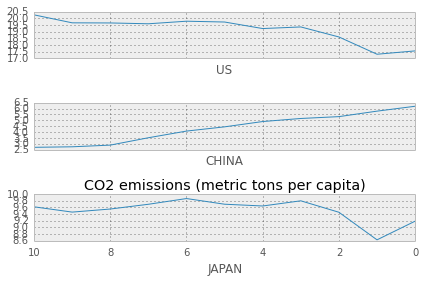

In [13]:
#<help:world_bank_plot>
import datetime
import pandas as pd
import numpy as np
from pandas.io import wb
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.mpl_style = 'default'

indicator1= wb.download(indicator='EN.ATM.CO2E.PC', country=['US'], start=2000, end=2010)
indicator2= wb.download(indicator='EN.ATM.CO2E.PC', country=['CN'], start=2000, end=2010)
indicator3= wb.download(indicator='EN.ATM.CO2E.PC', country=['JP'], start=2000, end=2010)
df1 = pd.DataFrame(indicator1)
df2 = pd.DataFrame(indicator2)
df3 = pd.DataFrame(indicator3)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)
plt.gca().invert_xaxis() #due to limitations in the API 
#the latest year is shown first, so we inverted the x axis.
ax1.plot(df1)
ax1.set_xlabel('US')
ax2.plot(df2)
ax2.set_xlabel('CHINA')
ax3.plot(df3)
ax3.set_xlabel('JAPAN')
plt.title('CO2 emissions (metric tons per capita)')
fig.tight_layout()
plt.show()

# Plot Financial Data

## Yahoo Finance Closing Price
Plot financial data from Yahoo Finance.

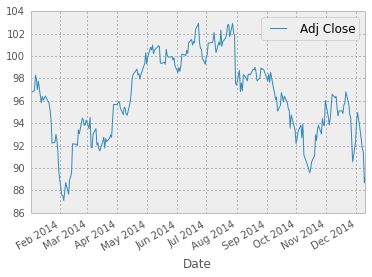

In [14]:
#<help:plot_adj_close>
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
import numpy as np
import pandas.io.data
from pandas.io.data import DataReader
pd.options.display.mpl_style = 'default'
sp500 = pd.io.data.get_data_yahoo("XOM", start=datetime.datetime(2014, 1, 1)) 
close = sp500['Adj Close']
close.plot()
plt.legend(loc = 'best')
plt.show()

## Google Finance Moving Average
Read stock price info for ticker symbol from Google Finance into local `csv` file and into DataFrame. Compute and plot moving average of stock price.

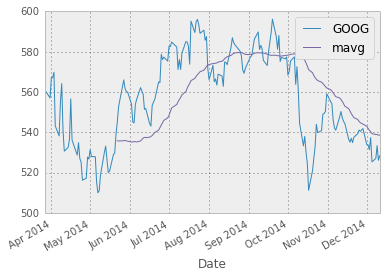

In [15]:
#<help:plot_moving_avg>
import datetime
import pandas as pd
import numpy as np
import pandas.io.data
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.mpl_style = 'default'
goog = pd.io.data.get_data_yahoo('GOOG', 
                                 start=datetime.datetime(2009, 10, 1), 
                                 end=datetime.datetime(2015, 1, 1))
goog.to_csv('google.csv')
df = pd.read_csv('/resources/google.csv', index_col='Date', parse_dates=True)
close_px = df['Adj Close']
mavg = pd.rolling_mean(close_px, 40)
close_px.plot(label='GOOG')
mavg.plot(label='mavg')
plt.legend()

## Yahoo Finance Price and Volume

Read stock price and volume for ticker symbol from Yahoo Finance into into DataFrame and plot both.

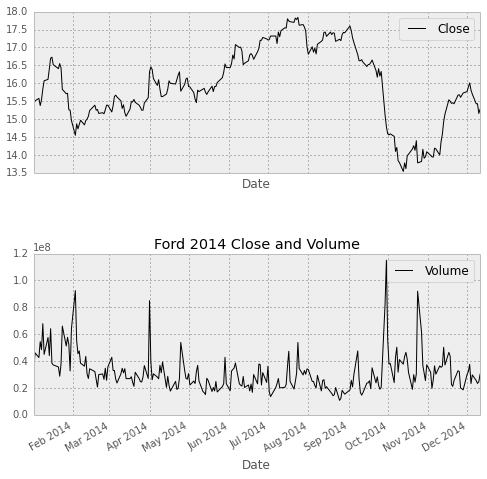

In [16]:
#<help:plot_adj_close_volume>
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
import pandas.io.data
pd.options.display.mpl_style = 'default'
data = pd.io.data.get_data_yahoo("F", start = '2014-01-01', end = '2014-12-31')[['Close', 'Volume']]
data.plot(subplots = True, figsize = (8, 8));
plt.title('Ford 2014 Close and Volume')
plt.legend(loc = 'best')
plt.show()

## FRED Currency Data

Plot FRED currency data.

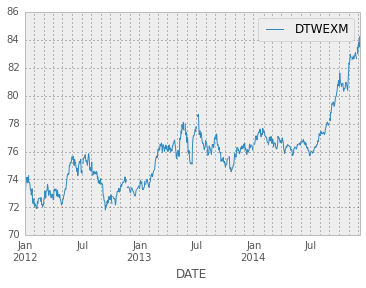

In [17]:
#<help:plot_fred_currency>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
import pandas.io.data as web
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.mpl_style = 'default'

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)
usd = web.DataReader('DTWEXM', 'fred', start, end)
usd.plot()
plt.show()

## Compare FRED Oil Prices

Compare FRED oil prices for different years.

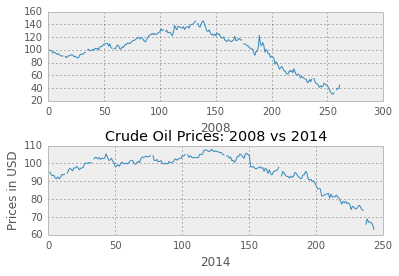

In [18]:
#<help:plot_fred_year_comparison>
import pandas.io.data
import pandas as pd
import numpy as np
import datetime
import pandas.io.data as web
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.mpl_style = 'default'
start2008 = datetime.datetime(2008, 1, 1)
end2008 = datetime.datetime(2008, 12, 31)
start2014 = datetime.datetime(2014, 1, 1)
end2014 = datetime.datetime(2014, 12, 31)
oil2008 = web.DataReader('DCOILWTICO', 'fred', start2008, end2008)
oil2014 = web.DataReader('DCOILWTICO', 'fred', start2014, end2014)
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(oil2008)
ax2.plot(oil2014)
ax1.set_xlabel('2008')
ax2.set_xlabel('2014')
ax2.set_ylabel('Prices in USD')
plt.title('Crude Oil Prices: 2008 vs 2014')
plt.show()

## Compare Yahoo Finance Stock Price for multiple companies

Compare price info for multiple companies.

In [19]:
#<help:yahoo_get_multiple>
import datetime
import pandas as pd
import numpy as np
import pandas.io.data
df = pd.io.data.get_data_yahoo(['AAPL', 'GE', 'GOOG', 'IBM', 'KO', 'MSFT', 'PEP'], 
                               start=datetime.datetime(2012, 1, 1), 
                               end=datetime.datetime(2014, 12, 3))['Adj Close']
df.tail()

,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
Date,,,,,,,
2014-11-26,119.00,26.87,540.37,161.95,44.29,47.75,98.70
2014-11-28,118.93,26.49,541.83,162.17,44.83,47.81,99.45
2014-12-01,115.07,26.02,533.80,161.54,44.55,48.62,99.02
2014-12-02,114.63,26.05,533.75,162.67,44.54,48.46,99.73
2014-12-03,115.93,26.38,531.32,164.52,43.80,48.08,98.32


## Want to learn more?

<a href="http://bigdatauniversity.com/courses/python-for-data-analysis/?utm_source=tutorial-financial-pandas&utm_medium=dswb&utm_campaign=bdu"><img src = "https://ibm.box.com/shared/static/nw8w4ssxilysjzz1i49ygdrm8x1en6qw.png"> </a>

Created by: <a href="https://bigdatauniversity.com/?utm_source=bducreatedbylink&utm_medium=dswb&utm_campaign=bdu">The Cognitive Class Team</a>